In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [182]:
coriolis_r=[12.4/100,
9.651941085/100,
7.180200626/100,
4.605702782/100,
2.320840986/100,
0,
2.542253637/100,
5.343422535/100,
8.095905847/100,
10.90389391/100,
13.4267318/100
]
coriolis_th=[0,
6.231731446,
6.201551342,
6.164344328,
6.124978933,
0,
2.876451125,
2.781152437,
2.756190784,
2.68761439,
2.656202402
]

In [183]:
cent_r=[16.45411948/100,
15.50848812/100,
14.56567779/100,
13.56380189/100,
12.79775897/100,
11.59175743/100,
10.55084545/100,
9.615035678/100,
8.582534168/100,
7.492819655/100,
6.715949945/100,
5.498154847/100,
4.668423301/100,
3.441368051/100,
2.499154523/100,
1.250396254/100,
0.170059862/100,
0.982145136/100,
2.201497471/100,
3.369520943/100,
4.524885508/100,
5.58690529/100,
6.889221773/100,
8.142986902/100,
9.415472945/100,
10.55478648/100,
11.59803715/100,
12.90556524/100,
14.55568529/100,
15.92663285/100,
17.31608417/100

]
cent_th=[6.283990542,
6.434243154,
6.57605705,
6.698549143,
6.844463969,
6.970195322,
0.8303335,
0.97928632,
1.103050442,
1.240363771,
1.37387988,
1.524787077,
1.692728988,
1.840429505,
1.972041073,
2.233825211,
3.016670188,
5.652801484,
5.592634657,
5.773194831,
5.941036896,
6.070334389,
6.219904937,
6.362798807,
6.491083055,
6.652522894,
6.774952443,
6.928323267,
0.790833849,
0.935471283,
1.071
]
Rcirc=259/1000

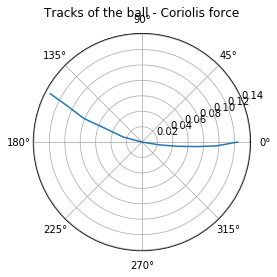

In [184]:
plt.polar(coriolis_th,coriolis_r)
plt.title("Tracks of the ball - Coriolis force")
plt.show()

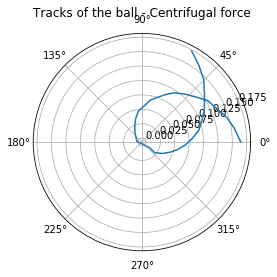

In [185]:
plt.polar(cent_th,cent_r)
plt.title("Tracks of the ball - Centrifugal force")
plt.show()

In [199]:
def S(r1,r2,th1,th2):#distance betwenn 2 points in polar coordinate
    return np.sqrt(r1**2+r2**2-2*r1*r2*np.cos(th1-th2))

def midpoint(r1,r2,th1,th2):#midpoint coordiante in polar, return[r,theta]
    return[(r1*np.cos(th1)+r2*np.cos(th2))/2,(r1*np.sin(th1)+r2*np.sin(th2))/2]


In [200]:
coriolis_s=[0]
for i in range(len(coriolis_r)-1):
    s=S(cent_r[i],cent_r[i+1],cent_th[i],cent_th[i+1])
    coriolis_s.append(coriolis_s[i]+s)

print(coriolis_s)

t_20=[]
for i in range(len(coriolis_r)):
    t_20.append(20*10**(-3)*i)
print(t_20)

[0, 0.02577646218335723, 0.049066439534872656, 0.06897722121428035, 0.08965599755100256, 0.10914060851968019, 0.12809185859895372, 0.14576210145433016, 0.16102143501109495, 0.1765071904982392, 0.18875158420061902]
[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]


In [220]:
p=np.polyfit(t_20,coriolis_s,2)
yfit=np.polyval(p,t_20)
res=coriolis_s-yfit

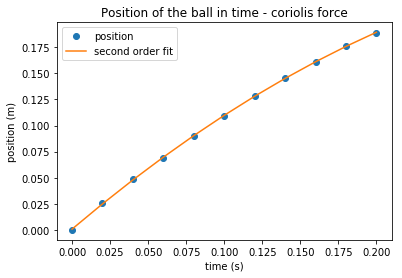

In [221]:
plt.plot(t_20,coriolis_s,'o',label='position')
plt.plot(t_20,yfit,label='second order fit')
plt.title('Position of the ball in time - coriolis force')
plt.xlabel('time (s)')
plt.ylabel("position (m)")
plt.legend()
plt.show()

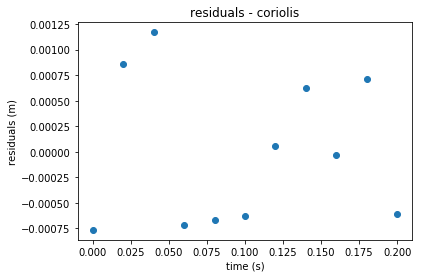

1.1423548344642724e-17


In [222]:
plt.plot(t_20,res,'o',label='residuals')
plt.title('residuals - coriolis')
plt.xlabel('time (s)')
plt.ylabel('residuals (m)')
plt.show()
print(np.mean(res))
#The residuals are distributed randomly and have a mean close to 0,
#therefore the second order fit is a good fit to the data set

In [223]:
w=(math.radians(180)-(coriolis_th[-1]))/((len(coriolis_th)-1)*20*10**(-3))
print('w =',w,'degrees/s')

#derivative of second order is (2a)x+b evaluated at the point closest to origin of circle which is the 6th point
vrot=2*p[0]*t_20[5]+p[1] 
print('vrot =',vrot,'m/s')

arot=2*w*vrot
print('arot =',arot,'m/s^2')

acirc=vrot**2/Rcirc
print('acric =',acirc,'m/s^2')

w = 2.426951257948966 degrees/s
vrot = 0.9429779282815178 m/s
arot = 4.577122938521879 m/s^2
acric = 3.4332331012590864 m/s^2


Discussion:
arot is not the same as acirc

In [205]:
cent_s=[0]
for i in range(len(cent_r)-1):
    s=S(cent_r[i],cent_r[i+1],cent_th[i],cent_th[i+1])
    cent_s.append(cent_s[i]+s)
print(cent_s)
    
t_30=[]
for i in range(len(cent_r)):
     t_30.append(30*10**(-3)*i)
        
print(t_30)

[0, 0.02577646218335723, 0.049066439534872656, 0.06897722121428035, 0.08965599755100256, 0.10914060851968019, 0.12809185859895372, 0.14576210145433016, 0.16102143501109495, 0.1765071904982392, 0.18875158420061902, 0.203990777869598, 0.21586806362417837, 0.2294897728351144, 0.23967076522890252, 0.25298365972233466, 0.2643455382117815, 0.27568486879322757, 0.28791043620585316, 0.30058112560301564, 0.3138603347816039, 0.32630993871821856, 0.3422958219173927, 0.3587744212017409, 0.3757427418899615, 0.395446786892018, 0.4125375915544148, 0.43539274300178243, 0.4612836302083384, 0.4872081047172665, 0.5136438552311007]
[0.0, 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3, 0.32999999999999996, 0.36, 0.39, 0.42, 0.44999999999999996, 0.48, 0.51, 0.54, 0.57, 0.6, 0.63, 0.6599999999999999, 0.69, 0.72, 0.75, 0.78, 0.8099999999999999, 0.84, 0.87, 0.8999999999999999]


In [206]:
pc=np.polyfit(t_30,cent_s,3)
yfitc=np.polyval(pc,t_30)
resc=cent_s-yfitc

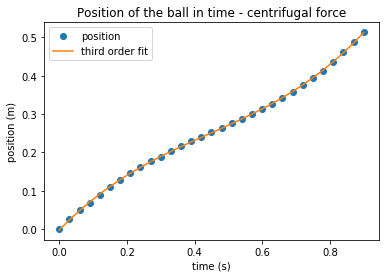

In [207]:
plt.plot(t_30,cent_s,'o',label='position')
plt.plot(t_30,yfitc,label='third order fit')
plt.title('Position of the ball in time - centrifugal force')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.show()

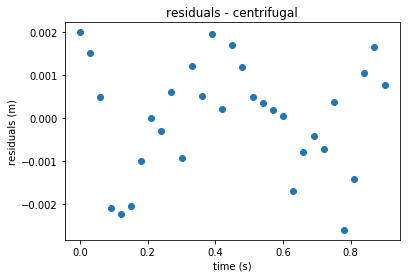

-8.986986781995975e-17


In [208]:
plt.plot(t_30,resc,'o')
plt.title('residuals - centrifugal')
plt.xlabel('time (s)')
plt.ylabel('residuals (m)')
plt.show()
print(np.mean(resc))
#residuals are randomly distributed and have a mean close to 0,
#thrid order is a good fit

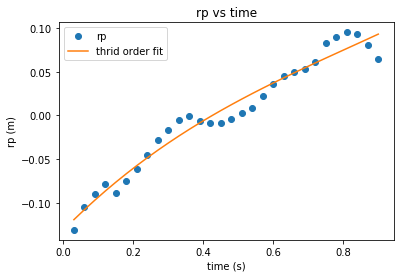

In [209]:
mpp=[]#all midpoints polar coordinates 
for i in range(len(cent_r)-1):
    mpp.append(midpoint(cent_r[i],cent_r[i+1],cent_th[i],cent_th[i+1]))

mp=[] #midpoints in cartesian coordinates
for i in range(len(mpp)):
    mp.append([mpp[i][0]*np.cos(mpp[i][1]),mpp[i][0]*np.sin(mpp[i][1])])

#cartesian coordinates of all points
cart=[]
for i in range(len(cent_r)):
    cart.append([cent_r[i]*np.cos(cent_th[i]),cent_r[i]*np.sin(cent_th[i])])

#find equation of the side of triangle that passes the midpoint
slope=[]
for i in range(len(mp)):
    slope.append((cart[i][1]-cart[i+1][1])/(cart[i][0]-cart[i+1][0]))

b=[]
for i in range(len(slope)):
    y=mp[i][1]
    x=mp[i][0]
    m=slope[i]
    b.append(y-m*x)
    
#find 90 degree angle intercept
#intercept has slope -1/(slope of line that passes the midpoint)
# mx+b=-x/(m)
# x=-b/(m+(1/m))
corner=[]
for i in range(len(slope)):
    x=-b[i]/(slope[i]+1/slope[i])
    y=slope[i]*x
    corner.append([x,y])
    
#distance between corner and midpoints
rp=[]
for i in range(len(corner)):
    if i <= 15: #after the 16th point, which is closest to origin, the direction of rp changes
        rp.append(-np.sqrt((corner[i][0]-mp[i][0])**2+(corner[i][0]-mp[i][1])**2))
    else: rp.append(np.sqrt((corner[i][0]-mp[i][0])**2+(corner[i][0]-mp[i][1])**2))

x = t_30[1:]
prp=np.polyfit(x,rp,3)
yfitrp=np.polyval(prp,x)
resrp=rp-yfitrp
plt.plot(x,rp,'o',label='rp')
plt.plot(x,yfitrp,label='thrid order fit')
plt.title('rp vs time')
plt.xlabel('time (s)')
plt.ylabel('rp (m)')
plt.legend()
plt.show()

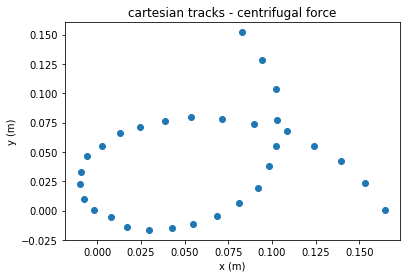

In [210]:
carttrans=np.transpose(cart)
plt.plot(carttrans[0],carttrans[1],'o')
plt.title('cartesian tracks - centrifugal force')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

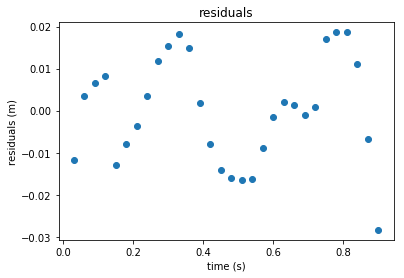

9.552543941045618e-17


In [225]:
plt.plot(x,resrp,'o')
plt.title('residuals')
plt.xlabel('time (s)')
plt.ylabel('residuals (m)')
plt.show()
print(np.mean(resrp))
#residuals are random and have a mean close to 0, the fit is good